# Custom TensorFlow for Classification

In [1]:
class Operation():
    def __init__(self,input_nodes=[]):
        self.input_nodes = input_nodes
        self.output_nodes = []

        for node in input_nodes:
            node.output_nodes.append(self)
        
        _default_graph.operations.append(self)
   
    def compute():
        pass

In [2]:
class add(Operation):
    def __init__(self,x,y):
        super().__init__([x,y])

    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        return x_var+y_var

In [3]:
class multiply(Operation):
    def __init__(self,x,y):
        super().__init__([x,y])

    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        return x_var*y_var

In [4]:
class matmultiply(Operation):
    def __init__(self,x,y):
        super().__init__([x,y])

    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        return x_var.dot(y_var)

In [5]:
class Placeholder():
    def __init__(self):
        self.output_nodes=[]
        _default_graph.placeholders.append(self)
        

In [6]:
class Variable():
    def __init__(self,initial_value=None):
        self.value = initial_value
        self.output_nodes=[]
        _default_graph.variables.append(self)

In [110]:
class Graph():
    def __init__(self):   
        self.operations = []
        self.placeholders = []
        self.variables =[]
    
    def set_as_default(self):
        global _default_graph
        _default_graph=self

In [111]:
g = Graph()

In [112]:
g.set_as_default()

In [113]:
A = Variable(10)

In [114]:
b = Variable(1)

In [115]:
x = Placeholder()

In [116]:
y = multiply(A,x)

In [117]:
z = add(y,b)

In [118]:
def traverse_postorder(operation):

#         PostOrder Traversal of Nodes. Basically makes sure computations are done in \n",
#         the correct order (Ax first , then Ax + b). Feel free to copy and paste this code.\n",
#         It is not super important for understanding the basic fundamentals of deep learning.\n",

    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)

    recurse(operation)
    return nodes_postorder

In [129]:
import numpy as np
class Session():
    def run(self,operation,feed_dict={}):
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            if type(node) == Placeholder:
                node.output = feed_dict[node]
                
            elif type(node) == Variable:
                node.output = node.value
            
            else:
                node.inputs = [input_node.output for input_node in node.input_nodes]
                node.output = node.compute(*node.inputs)
            
            if type(node.output)==list:
                node.output = np.array(node.output)
    
        return operation.output      

In [130]:
sess = Session()

In [131]:
result = sess.run(z,feed_dict={x:10})
result

array([[101, 201],
       [111, 221]])

In [138]:
g = Graph()
g.set_as_default()
A = Variable([[110,20],[11,22]])
b = Variable([1,1])
x = Placeholder()
y = matmultiply(A,x)
z = add(y,b)

In [139]:
sess = Session()

In [140]:
sess.run(z,{x:10})

array([[1101,  201],
       [ 111,  221]])

# Classification

## Activation Function

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [11]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [19]:
sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)

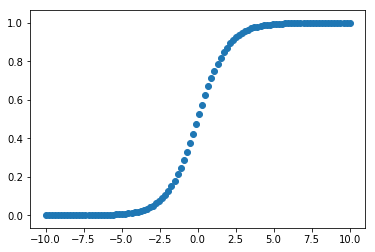

In [24]:
plt.scatter(sample_z,sample_a)

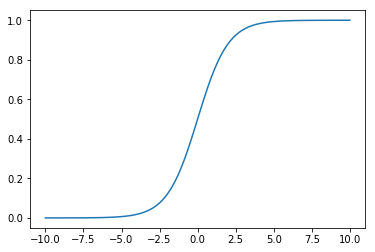

In [25]:
plt.plot(sample_z,sample_a)

In [26]:
class Sigmoid(Operation):
    def __init__(self,z):
        super().__init__([z])
    
    def compute():
        return 1/(1+np.exp(-z))        

In [27]:
from sklearn.datasets import make_blobs

In [29]:
data = make_blobs(50,2,2,random_state=75)
data

(array([[  7.3402781 ,   9.36149154],
        [  9.13332743,   8.74906102],
        [  1.99243535,  -8.85885722],
        [  7.38443759,   7.72520389],
        [  7.97613887,   8.80878209],
        [  7.76974352,   9.50899462],
        [  8.3186688 ,  10.1026025 ],
        [  8.79588546,   7.28046702],
        [  9.81270381,   9.46968531],
        [  1.57961049,  -8.17089971],
        [  0.06441546,  -9.04982817],
        [  7.2075117 ,   7.04533624],
        [  9.10704928,   9.0272212 ],
        [  1.82921897,  -9.86956281],
        [  7.85036314,   7.986659  ],
        [  3.04605603,  -7.50486114],
        [  1.85582689,  -6.74473432],
        [  2.88603902,  -8.85261704],
        [ -1.20046211,  -9.55928542],
        [  2.00890845,  -9.78471782],
        [  7.68945113,   9.01706723],
        [  6.42356167,   8.33356412],
        [  8.15467319,   7.87489634],
        [  1.92000795,  -7.50953708],
        [  1.90073973,  -7.24386675],
        [  7.7605855 ,   7.05124418],
        [  6

In [30]:
features = data[0]
labels = data[1]

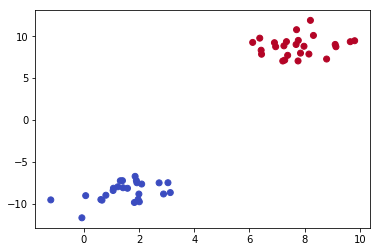

In [34]:
plt.scatter(features[:,0],features[:,1],c=labels,cmap='coolwarm')